In [1]:
# Import required libraries
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Fetch the 20 Newsgroups dataset and store it in the 'newsgroup_data_all' variable
newsgroup_data_all = fetch_20newsgroups(data_home= 'twenty_new_groups/', subset= 'all')

In [3]:
# Split the dataset into training and testing sets
# 80% of the data will be used for training and 20% for testing
x_train, x_test, y_train, y_test=train_test_split(newsgroup_data_all.data, newsgroup_data_all.target, train_size = 0.8, random_state=1)

In [4]:
# Create a list of stopwords and punctuation marks
stop_words = stopwords.words('english') + list(string.punctuation)

In [5]:
# Create a dictionary to store the word frequencies in the training data
word_count_dic = {}
# Iterate over each text in the training data
for text in x_train:
    # Tokenize the text and convert it to lowercase
    word_list = word_tokenize(text.lower())
    # Update the word frequencies in the 'word_count_dic' dictionary
    for word in word_list:
        if (word not in stop_words) and (len(word) > 2) and (word.isalpha()):
            word_count_dic[word] = word_count_dic.get(word, 0) + 1

In [6]:
# Sort the 'word_count_dic' by word frequency and keep only the top 10,000 words
sorted_word_count = sorted(word_count_dic.items(), key= lambda x:x[1], reverse = True)[:10000]

# Convert the sorted list of tuples back into a dictionary
sorted_word_count_dic = dict(sorted_word_count)

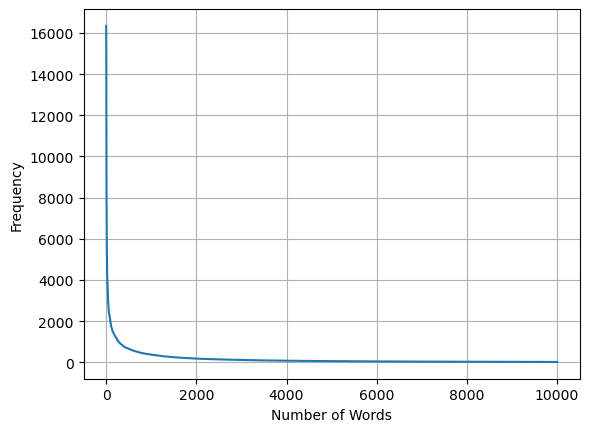

In [7]:
# Plot a graph of word frequencies for the top 10,000 words
import matplotlib.pyplot as plt
plt.plot(np.arange(1, 10001), sorted_word_count_dic.values())
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [8]:
# Create a list of features (top 10,000 words) to be used in the modified dataset
features = list(sorted_word_count_dic.keys())

In [9]:
# Define a function to modify the data based on the selected features
def data_modifier(x_data, features):
    # Create a matrix of zeros to store the modified data
    modified_data = np.zeros((len(x_data), len(features)))
    
    # Iterate over each text in the dataset
    for i in range(len(x_data)):
        # Tokenize the text and convert it to lowercase
        word_list = word_tokenize(x_data[i].lower())
        
        # Create a temporary dictionary to store word frequencies in each text
        temp_dic = {}
        
        # Update the word frequencies in the temporary dictionary
        for word in word_list:
            temp_dic[word] = temp_dic.get(word, 0) + 1
            
        # Assign the word frequencies from the temporary dictionary to the modified_data matrix
        for j in range(len(features)):
            if features[j] in temp_dic.keys():
                modified_data[i][j] = temp_dic[features[j]]
    return modified_data

In [10]:
# Modify the training and testing data using the selected features
x_train_mod = data_modifier(x_train, features)
x_test_mod = data_modifier(x_test, features)
x_train_mod.shape

(15076, 10000)

#### 1. Perform Test Classification using Multinomial Naive Bayes(already implemented in sklearn).

In [11]:
from sklearn.naive_bayes import MultinomialNB

# Initialize a Multinomial Naive Bayes classifier
nb_clf = MultinomialNB()

# Train the Naive Bayes classifier on the training data
nb_clf.fit(x_train_mod, y_train)

# Use the trained classifier to make predictions on the test data
y_pred = nb_clf.predict(x_test_mod)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Calculate the accuracy of the classifier by comparing the predicted labels with the true labels
accuracy_sk = accuracy_score(y_true=y_test, y_pred= y_pred)

# Print the accuracy of the Multinomial Naive Bayes classifier
print(f"Accuracy using Multinomial Naive Bayes from scratch: {accuracy_sk}")

# Print a detailed classification report showing precision, recall, and F1-score for each class
# target_names maps the numerical labels to their corresponding class names
print(classification_report(y_test, y_pred, target_names=newsgroup_data_all.target_names))

# Print confusion matrix
print(confusion_matrix(y_test,y_pred))

Accuracy using Multinomial Naive Bayes from scratch: 0.8710875331564987
                          precision    recall  f1-score   support

             alt.atheism       0.85      0.89      0.87       161
           comp.graphics       0.75      0.81      0.78       193
 comp.os.ms-windows.misc       0.85      0.79      0.82       205
comp.sys.ibm.pc.hardware       0.77      0.82      0.79       213
   comp.sys.mac.hardware       0.74      0.85      0.79       189
          comp.windows.x       0.87      0.74      0.80       188
            misc.forsale       0.83      0.84      0.83       201
               rec.autos       0.88      0.90      0.89       202
         rec.motorcycles       0.89      0.96      0.92       203
      rec.sport.baseball       0.96      0.96      0.96       185
        rec.sport.hockey       0.99      0.96      0.98       218
               sci.crypt       0.96      0.93      0.94       207
         sci.electronics       0.79      0.81      0.80       181
   

#### 2. Implement Naive Bayes on your own from scratch for text classification.

In [13]:
# Import required libraries
import numpy as np

# This class represents a Naive Bayes classifier, a probabilistic machine learning algorithm commonly used for
# classification tasks. It assumes independence between features given the class labels, which is why it's called
# "naive". The 'fit' method is used for training the classifier, and the 'predict' method is used for making predictions.
class NaiveBayes:
    
    # The 'fit' method is used for training the Naive Bayes classifier.
    def fit(self, x_train, y_train, features):
        self.features = features
        self.words_count = {} # A dictionary to store the count of words for each class and each feature
        classes = np.unique(y_train) # Get the unique class labels from the training data
        # Iterate over each class
        for clss in classes:
            self.words_count[clss] = {'Total': 0} # Initialize the count for each class
            class_data = x_train[y_train == clss] # Get the data points belonging to the current class
            # Count the occurrences of each feature in the class and update the 'words_count' dictionary
            for i in range(len(features)):
                self.words_count[clss][features[i]] = class_data[:, i].sum()
                self.words_count[clss]['Total'] += self.words_count[clss][features[i]]
                
    # The 'calculate_probability' method calculates the probability of a given data point (represented as a numpy array)
    # belonging to a specific class based on the word frequencies in the 'words_count' dictionary.
    def calculate_probability(self, np_array, words_count, class_name, features):
        words_dic = words_count[class_name]
        total = words_dic['Total']
        length = len(words_dic)
        prob = 0
        # Iterate over each feature in the data point and calculate the probability
        for i in range(len(np_array)):
            if np_array[i] != 0.0:
                # Calculate the logarithmic probability of the feature occurring in the given class
                curr_prob = np.log((words_dic[features[i]] + 1) / (total + length))
                prob += curr_prob
        return prob
    
    # The 'predict' method is used to make predictions for the given test data points.
    def predict(self, x_test):
        predictions = [] # A list to store the predicted class labels for each test data point
        features = self.features
        classes = list(self.words_count.keys()) # Get the list of unique class labels
        for np_array in x_test:
            best_prob = -1000 # Initialize the best probability to a very low value
            best_class = None # Initialize the best class label to None
            first_run = True # A flag to indicate if this is the first iteration of the loop
            # Iterate over each class label and calculate the probability of the test data point belonging to that class
            for class_name in classes:
                prob = self.calculate_probability(np_array, self.words_count, class_name, features)
                # Compare the calculated probability with the current best probability and update if necessary
                if first_run or prob > best_prob:
                    best_prob = prob
                    best_class = class_name
                first_run = False
            # Append the best class label for the current test data point to the 'predictions' list
            predictions.append(best_class)
        return predictions # Return the list of predicted class labels for all test data points

In [14]:
# Create an instance of the NaiveBayes class
alg = NaiveBayes()

In [15]:
# Fit the Naive Bayes classifier on the training data
alg.fit(x_train_mod, y_train, features)

In [16]:
# Make predictions on the test data using the trained classifier
# Note: This step may take some time depending on the size of the test data and the complexity of the classifier
pred_values = alg.predict(x_test_mod)

In [17]:
# Calculate the accuracy of the Naive Bayes classifier by comparing the predicted labels with the true labels
accuracy_sk = accuracy_score(y_true=y_test, y_pred = pred_values)

# Print the accuracy of the Multinomial Naive Bayes classifier implemented from scratch
print(f"Accuracy using Multinomial Naive Bayes from scratch: {accuracy_sk}")

# Print a detailed classification report showing precision, recall, and F1-score for each class
# target_names maps the numerical labels to their corresponding class names
print(classification_report(y_test, pred_values, target_names=newsgroup_data_all.target_names))

# Print confusion matrix
print(confusion_matrix(y_test,pred_values))

Accuracy using Multinomial Naive Bayes from scratch: 0.8594164456233422
                          precision    recall  f1-score   support

             alt.atheism       0.82      0.89      0.86       161
           comp.graphics       0.73      0.77      0.75       193
 comp.os.ms-windows.misc       0.85      0.76      0.80       205
comp.sys.ibm.pc.hardware       0.77      0.81      0.79       213
   comp.sys.mac.hardware       0.76      0.86      0.81       189
          comp.windows.x       0.84      0.73      0.78       188
            misc.forsale       0.81      0.85      0.83       201
               rec.autos       0.85      0.90      0.88       202
         rec.motorcycles       0.92      0.95      0.93       203
      rec.sport.baseball       0.94      0.94      0.94       185
        rec.sport.hockey       0.99      0.94      0.97       218
               sci.crypt       0.93      0.93      0.93       207
         sci.electronics       0.72      0.78      0.75       181
   